In [2]:
#To make a machine learning model that can predict the *ratings* that come from a **review**

In [3]:
#importing relavant packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import os

#importing NLP libaries 
import nltk
#to make tokens out of relavant words
from nltk.tokenize import word_tokenize 
#nltk.download('punkt')
#will be used to remove words such as 'this' 'that' 'is' which don't add value during model building
from nltk.corpus import stopwords 
#trims the words to be better recognised by the computer
from nltk.stem.porter import PorterStemmer 
#does almost the same as stemmer but is human readable
from nltk.stem import WordNetLemmatizer 

#importing library for visualization
from wordcloud import WordCloud

In [4]:
#import the data 
data = pd.read_csv("C:/Users/Diya/Downloads/reviews_data_dump/reviews_badminton/data.csv", encoding='latin1')

Data exploration ------ 1

In [5]:
#explore data
data.head()
#important columns Review Title and Review Text 
#target column: Ratings

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust Ã¢?Â¹620 ..from retailer.I did...,1


In [6]:
data

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust Ã¢?Â¹620 ..from retailer.I did...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [7]:
#Looking into a few reviews to get an idea of the contents
for i in range(7):
    print(data['Review text'][i]+'\n')

Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE

They didn't supplied Yonex Mavis 350. Outside cover was Yonex Ad inside was a cheapest....  Sad to hear this.READ MORE

Worst product. Damaged shuttlecocks packed in new box. It's not a original yonex product. Don't buy.flipkart platform is chosen to fraud the buyers.READ MORE

Quite O. K. , but nowadays  the quality of the corks like not as before 3 to 5 years back.. I am using MAVIS 350 for more than 15 years quality of corks was very very good at that times, but now I am not getting the quality corks as like before, rate of corks also too much now, I am  very sorry to say like this, but in my experience , my Statment is very true to   my knowledgeREAD MORE

Over pricedJust Ã¢?Â¹620 ..from retailer.I didn't understand.. Wat is d advantage of buying dis frm flipkrtREAD MORE

Good qu

In [8]:
#at first glance words that add, noise found:
#1. '.READ MORE'
#2. 'READ MORE'

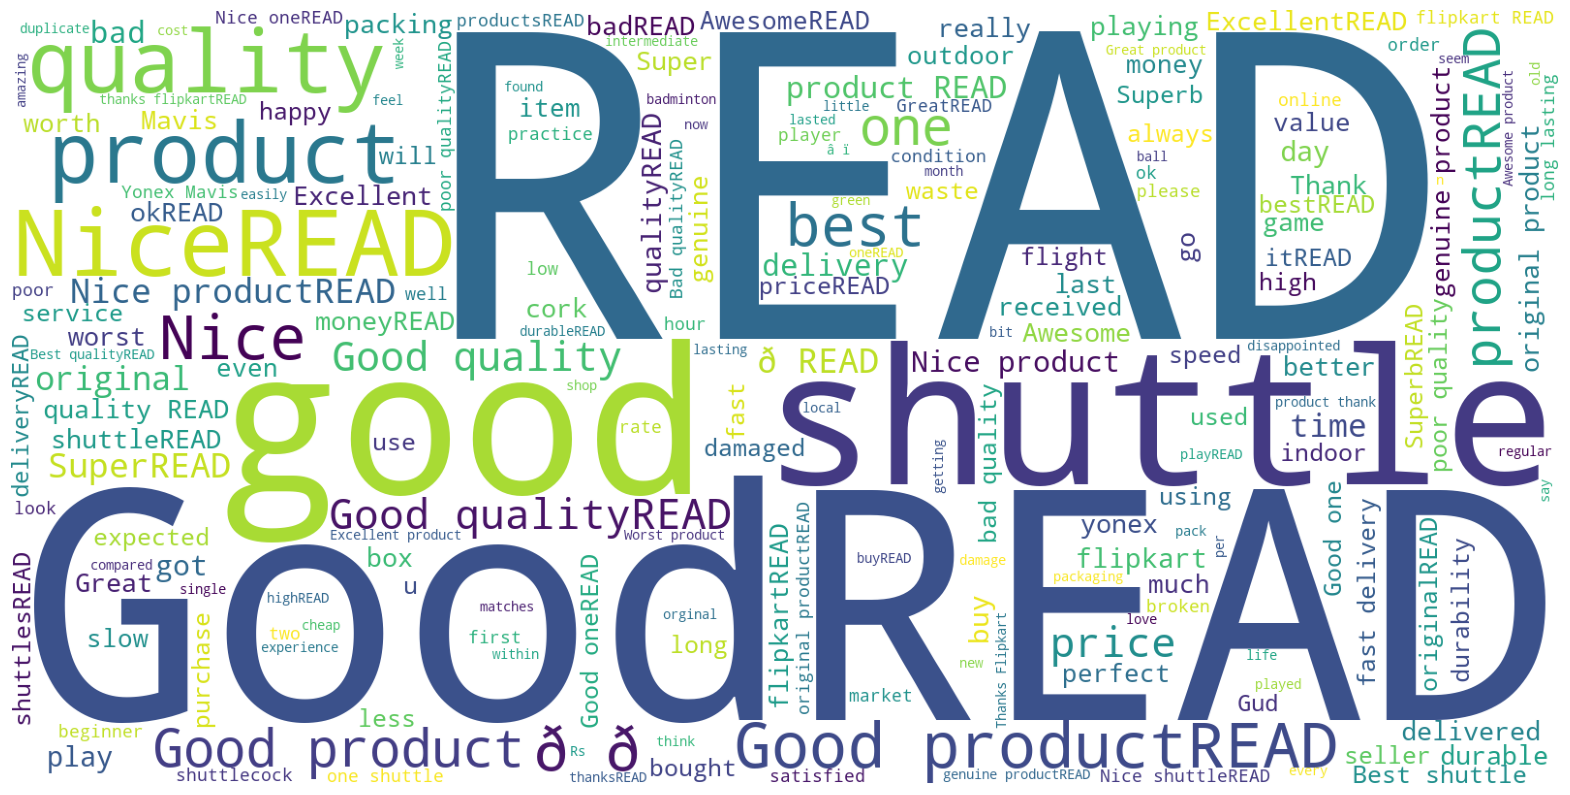

In [9]:
#visualizing the highest occurance of words from **Review text** 

text = ' '.join(str(review) for review in data['Review text'])

wc = WordCloud(background_color = 'white',
              width=1600,
              height=800).generate(text)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [10]:
#we're making another review text column and converted it into string for **analysis purposes only**.
data['Review conv string'] = data['Review text'].apply(str)

In [11]:
#"pre-cleaning" function 
def pre_clean(sentence):   
    #removes .READ MORE and READ MORE from the strings
    sentence = re.sub('.READ MORE', '',sentence)
    sentence = re.sub('READ MORE', '', sentence)
    return sentence

In [12]:
#for analysis that won't actually clean the data we will use to build a model,
#(that would be data['Review text']).
data['Review conv string'] = data['Review conv string'].apply(lambda doc: pre_clean(doc))

In [13]:
#Looking for null values
data.isnull().sum()

Reviewer Name          10
Review Title           10
Place of Review        50
Up Votes               10
Down Votes             10
Month                 465
Review text             8
Ratings                 0
Review conv string      0
dtype: int64

In [14]:
#Review title : 10
#Review text : 8

In [15]:
#target data info 
sorted(data['Ratings'].unique())

[1, 2, 3, 4, 5]

In [16]:
#distribution among 5 classes
data['Ratings'].value_counts()

5    5080
4    1746
1     769
3     615
2     308
Name: Ratings, dtype: int64

In [17]:
#to better understand distribution of ratings, in terms of percentages
round(data['Ratings'].value_counts()/sum(data['Ratings'].value_counts())*100,2)

5    59.64
4    20.50
1     9.03
3     7.22
2     3.62
Name: Ratings, dtype: float64

In [18]:
#make a column recording the length of each review
data['length'] = data['Review conv string'].apply(len)

In [19]:
#dividing data to positive and negative experience based on Ratings
data['pos_vs_neg'] = [1 if x >= 3 else 0 for x in data['Ratings'] ]

(array([22.,  6.,  6., 15., 12., 41., 33., 68., 35., 36.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

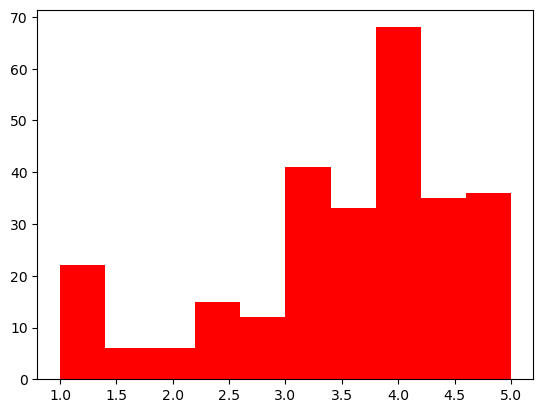

In [20]:
#histogram plot to see if there is a relationship between length of a review and it's rating
ratings_len=data.groupby('length')['Ratings'].mean()
plt.hist(ratings_len,color='red')

In [21]:
#distribution of positive and negative ratings, in terms of percentages
round(data['pos_vs_neg'].value_counts()/sum(data['pos_vs_neg'].value_counts())*100,2)

1    87.36
0    12.64
Name: pos_vs_neg, dtype: float64

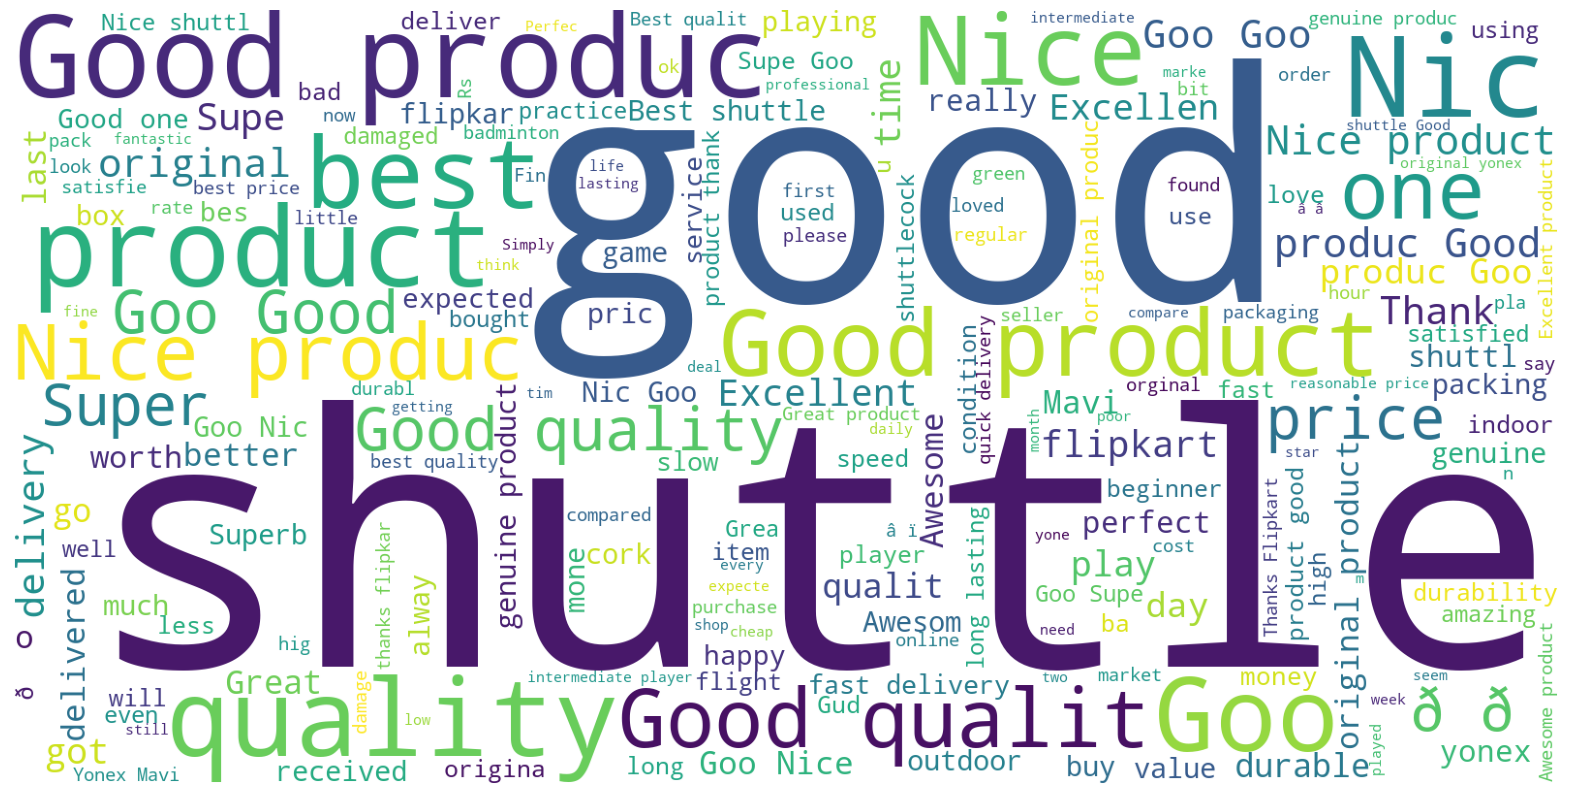

In [22]:
#visual of positive reviews, words that are most often used

positive = data[data['pos_vs_neg']==1]

text = ' '.join(str(review) for review in positive['Review conv string'])

wc = WordCloud(background_color = 'white',
              width=1600,
              height=800).generate(text)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()


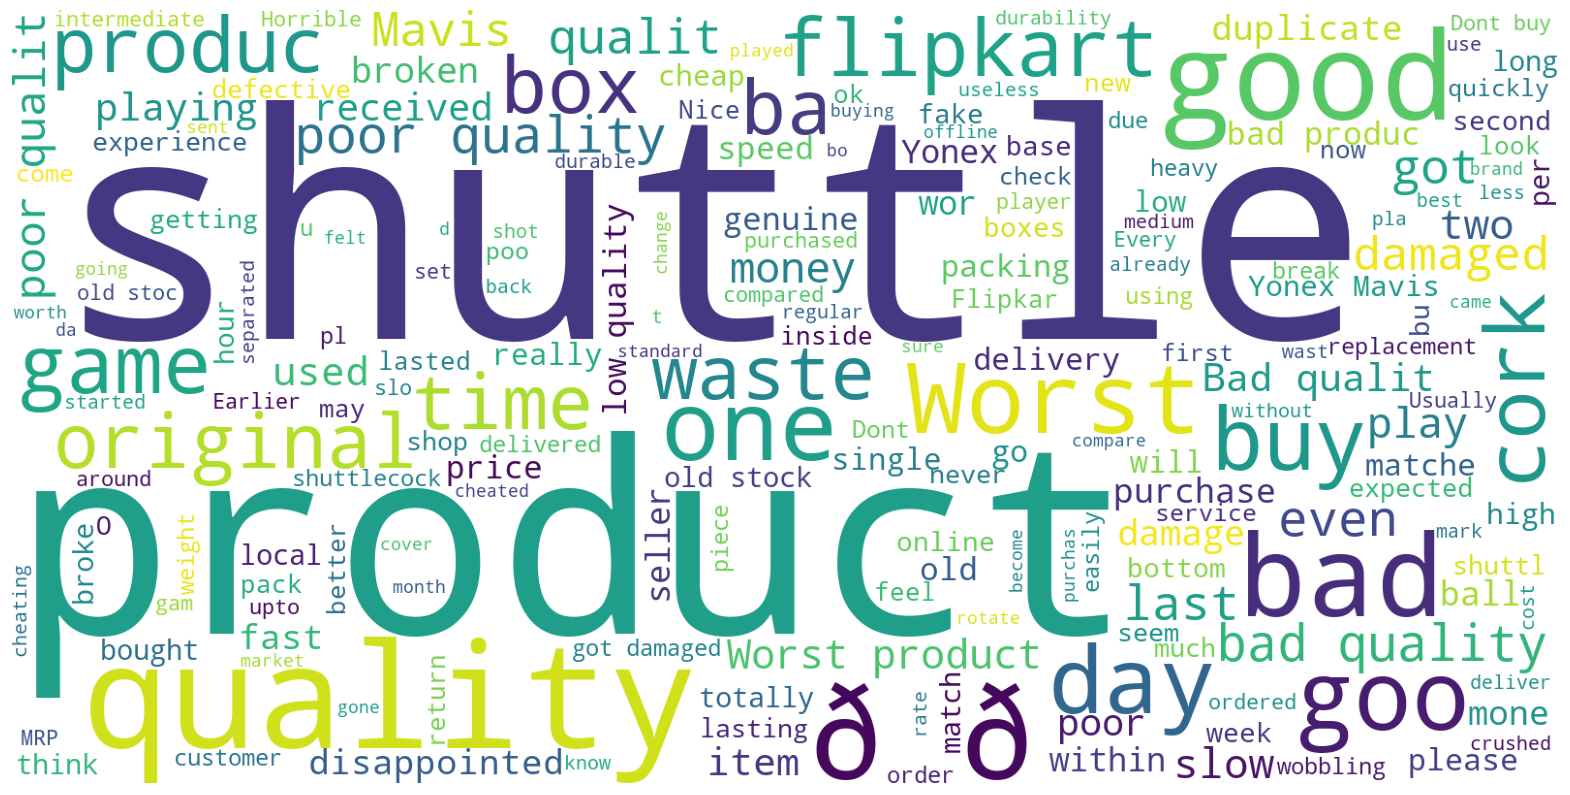

In [23]:
#visual of regative reviews, words that are most often used

negative = data[data['pos_vs_neg']==0]

text = ' '.join(str(review) for review in negative['Review conv string'])

wc = WordCloud(background_color = 'white',
              width=1600,
              height=800).generate(text)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Reviewer Name       8508 non-null   object 
 1   Review Title        8508 non-null   object 
 2   Place of Review     8468 non-null   object 
 3   Up Votes            8508 non-null   float64
 4   Down Votes          8508 non-null   float64
 5   Month               8053 non-null   object 
 6   Review text         8510 non-null   object 
 7   Ratings             8518 non-null   int64  
 8   Review conv string  8518 non-null   object 
 9   length              8518 non-null   int64  
 10  pos_vs_neg          8518 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 732.1+ KB


In [25]:
data.shape

(8518, 11)

In [26]:
#We're going to try to remove some datapoints 
# ZS
# data.drop(data.query('Ratings==5').sample(frac=0.3).index, inplace=True)


In [27]:
#distribution among 5 classes
data['Ratings'].value_counts()

5    5080
4    1746
1     769
3     615
2     308
Name: Ratings, dtype: int64

In [28]:
#looking at review title for general understanding of info
data['Review Title'].unique()[0:20]

array(['Nice product', "Don't waste your money",
       'Did not meet expectations', 'Fair', 'Over priced',
       'Mind-blowing purchase', 'Must buy!', 'Classy product',
       'Great product', 'Just wow!', 'Terrific purchase',
       'Worth every penny', 'Brilliant', 'I think it is duplicate',
       'Slightly disappointed', 'Super!', 'Awesome', 'Highly recommended',
       'Unsatisfactory', 'Fabulous!'], dtype=object)

Data cleaning -------2

In [29]:
data.dropna(subset = 'Review text', inplace = True)
data.dropna(subset = 'Review Title', inplace = True)

Splitting data into Train and Test ------3

In [30]:
#joining both Review title and Review text for model buildng 
data['text_info'] = data['Review text']+' '+data['Review Title']
df = data[['text_info', 'pos_vs_neg']]

In [31]:
#input and output columns
X = data.text_info
y = data.pos_vs_neg

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

Data preprocessing on train data -------4

In [33]:
import re
#to remove punctuations we use this library:
import string 

In [34]:
lemmatizer = WordNetLemmatizer()

#we're gonna use this function in Bag of words/Count vectorizer (same thing)
def clean(data):
    #removes everything that isn't alphabets
    sentence = re.sub('^a-zA-Z', ' ', data) 
    #removes .READ MORE and READ MORE from the strings
    sentence = re.sub('.READ MORE', ' ',sentence)
    sentence = re.sub('READ MORE', ' ', sentence)
    
    #using string library to remove punctuations; numbers are also removed
    sentence = ''.join([x for x in sentence if x not in string.punctuation and not x.isdigit() ])
    
    #converting string to lower case
    sentence = sentence.lower()
    
    #tokenization
    tokens =  nltk.word_tokenize(sentence)
    
    #lemmatization
    lemmatized_tokens=[lemmatizer.lemmatize(token) for token in tokens]
    
    #removing stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [x for x in lemmatized_tokens if x not in stop_words]
    
    #joing and return
    return ' '.join(filtered_tokens)
    
    

In [35]:
%time X_train_clean = X_train.apply(lambda doc: clean(doc))

Wall time: 5.3 s


In [36]:
 %time X_test_clean = X_test.apply(lambda doc: clean(doc))

Wall time: 1.13 s


In [37]:
#####################################################################################################

BUILDING pipelines

In [38]:
#things required to build a pipeline

#hyperparameters
#estimator


In [39]:
#importing required libraries
from sklearn.pipeline import Pipeline
import tensorflow


In [40]:
#importing libraries for each algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
#import tf.text import BertTokenizer

#preprocessing libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
from nltk.tokenize import word_tokenize
import spacy

#kfold cross-validation library
from sklearn.model_selection import GridSearchCV

#metrics 
from sklearn.metrics import f1_score

In [41]:
#helps with cacheing to save memory
import joblib
from joblib import Memory

In [42]:
#lets avoid returning warnings
import warnings

warnings.filterwarnings('ignore')

In [50]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

#algorithm pipeline
pipelines ={
    'k_nearest_neighbors': Pipeline([
        ('prep', CountVectorizer()),
        ('classifier', KNeighborsClassifier())
    ], memory=memory),
    'naive_bayes': Pipeline([
        ('prep', CountVectorizer()),
        ('classifier', BernoulliNB())
    ], memory=memory),
    'SVC': Pipeline([
        ('prep', CountVectorizer()),
        ('classifier', SVC())
    ], memory=memory),
    'decision_tree' : Pipeline([
        ('prep', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression' : Pipeline([
        ('prep', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'random_forest' : Pipeline([
        ('prep',CountVectorizer()),
        ('classifier', RandomForestClassifier() )
    ], memory=memory),
    'stacking' : Pipeline([
        ('prep', CountVectorizer()),
        ('classifier', StackingClassifier([('lr', LogisticRegression()),
              ('svc', SVC()),
               ('dt', DecisionTreeClassifier())]))
    ],memory=memory),
    'adaboost':Pipeline([
        ('prep', CountVectorizer()),
        ('classifier', AdaBoostClassifier())
    ], memory=memory),
    'gradientboost': Pipeline([
        ('prep', CountVectorizer()),
        ('classifier', GradientBoostingClassifier())
    ], memory=memory),
    'xgboost': Pipeline([
        ('prep', CountVectorizer()),
        ('classifier', XGBClassifier())
    ], memory=memory)
}
#parameter pipeline
param_grids = {
    'k_nearest_neighbors': [{
        'prep': [CountVectorizer(),TfidfVectorizer()],
        'classifier__n_neighbors': [i for i in range(3, 21, 2)],
        'classifier__p':[1,2,3]}
    ],
    'naive_bayes' : [{
        'prep':[CountVectorizer(),TfidfVectorizer()],
        'prep__max_features':[1000,1500,2000,5000],
        'classifier__alpha':[1,10]
    }],
    'SVC' : [{
        'prep': [CountVectorizer(),TfidfVectorizer()],
        'classifier__kernel':['poly', 'rbf', 'sigmoid'],
        'classifier__C': [0.1, 1, 10], 
        'classifier__gamma' : ['scale', 'auto']
    }],
    'decision_tree' : [{
        'prep':[CountVectorizer(),TfidfVectorizer()],
        'prep__max_features':[1000,1500,2000,5000],
        'classifier__max_depth':[None,5,10]
    }],
    'logistic_regression' : [{
        'prep': [CountVectorizer(), TfidfVectorizer()],
        'prep__max_features' : [1000, 1500, 2000, 5000], 
        'classifier__C': [0.1, 1, 10], 
        'classifier__penalty': ['elasticnet'], 
        'classifier__l1_ratio': [0.4, 0.5, 0.6],
        'classifier__solver': ['lbfgs', 'liblinear','saga'],
        'classifier__class_weight': ['balanced']
    }],
    'random_forest' : [{
        'prep': [CountVectorizer(), TfidfVectorizer()],
        'prep__max_features': [1000, 1500, 2000, 5000],
        'classifier__n_estimators': [10],
        'classifier__max_depth': [8,16,32,64],
        'classifier__max_features': ['sqrt', 'log2', None]
    }],
    'stacking': [{
        'prep': [CountVectorizer(), TfidfVectorizer()],
        'classifier__cv':[20]
    }],
    'adaboost':[{
        'prep': [CountVectorizer(), TfidfVectorizer()],
        'classifier__learning_rate':[0.1,0.5,0.9], 
        'classifier__n_estimators': [50,100,150],
        #'classifier__base_estimator':[DecisionTreeClassifier(max_depth=10, random_state=42)]
    }],
    'gradientboost':[{
        'prep':[CountVectorizer(), TfidfVectorizer()],
        'classifier__learning_rate':[0.1,0.5,0.9,1.5],
        'classifier__n_estimators':[100,150,200,250]
        }],
    'xgboost':[{
        'prep': [CountVectorizer(), TfidfVectorizer()],
        'classifier__n_estimators':[20,30,50,100]
    }]
}

#performing grid search for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train_clean, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** k_nearest_neighbors **********
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Wall time: 3min 19s
Score on Test Data:  0.9409044193216856
********** naive_bayes **********
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Wall time: 10.5 s
Score on Test Data:  0.937581613998433
********** SVC **********
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Wall time: 5min 16s
Score on Test Data:  0.9520816967792616
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Wall time: 32.5 s
Score on Test Data:  0.9472316090460099
********** logistic_regression **********
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Wall time: 10min 48s
Score on Test Data:  0.9311203319502075
********** random_forest **********
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Wall time: 3min 44s
Score on Test Data:  0.9503657262277951
********** stacking **********
Fitting 5 folds for each

In [51]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

k_nearest_neighbors
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('prep', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier())])

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('prep', CountVectorizer(max_features=5000)),
                ('classifier', BernoulliNB(alpha=1))])

SVC
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('prep', TfidfVectorizer()), ('classifier', SVC(C=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('prep', CountVectorizer(max_features=2000)),
                ('classifier', DecisionTreeClassifier(max_depth=5))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('prep', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])

random_fores

In [52]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'best_models/{name}.pkl')
    model = joblib.load(f'best_models/{name}.pkl')
    
    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (F1)", f1_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")

********** k_nearest_neighbors **********
Wall time: 672 ms
Test Score (F1) 0.9409044193216856
Model Size: 533200 Bytes
********** naive_bayes **********
Wall time: 41.2 ms
Test Score (F1) 0.937581613998433
Model Size: 163575 Bytes
********** SVC **********
Wall time: 744 ms
Test Score (F1) 0.9520816967792616
Model Size: 370826 Bytes
********** decision_tree **********
Wall time: 29.4 ms
Test Score (F1) 0.9472316090460099
Model Size: 75673 Bytes
********** logistic_regression **********
Wall time: 25.2 ms
Test Score (F1) 0.9311203319502075
Model Size: 95258 Bytes
********** random_forest **********
Wall time: 29.8 ms
Test Score (F1) 0.9503657262277951
Model Size: 149825 Bytes
********** stacking **********
Wall time: 744 ms
Test Score (F1) 0.9534883720930233
Model Size: 511270 Bytes
********** adaboost **********
Wall time: 123 ms
Test Score (F1) 0.9479466387653676
Model Size: 159730 Bytes
********** gradientboost **********
Wall time: 48.3 ms
Test Score (F1) 0.9509315140383101
Model S

Using Word2Vec for numerical feature extraction

In [53]:
#checking version
gensim.__version__

'4.1.2'

In [54]:
#let's look at our options
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


glove-twitter-50 is the pretrained model we will be using  

In [ ]:
#downloaded and saved the vectors for future use

#wv = api.load('glove-twitter-50')
#wv.save('vectors_1.kv')

In [55]:
#this is the future
#loading data

from gensim.models import KeyedVectors
%time wv = KeyedVectors.load('vectors_1.kv')

Wall time: 1.57 s


In [56]:
#function to take words in the sentence, count them, and scale them 

def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res=np.zeros(vector_size)
    ctr=1
    for w in sent:
        if w in wv:
            ctr+=1
            wv_res+= wv[w]
    wv_res=wv_res/ctr
    return wv_res

In [57]:
#sending our Xtrain and Xtest data to sent_vec function

X_train_vec= X_train_clean.apply(sent_vec)
X_test_vec = X_test_clean.apply(sent_vec)

In [58]:
#converting the vectorized sentence to list

X_train = X_train_vec.to_list()
X_test=X_test_vec.to_list()

In [59]:
#running pipeline for word2vec processed data

cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

#algorithm pipeline
pipelines ={
    'k_nearest_neighbors': Pipeline([
        ('prep', CountVectorizer()),
        ('classifier', KNeighborsClassifier())
    ], memory=memory),
    'naive_bayes': Pipeline([
        ('prep', CountVectorizer()),
        ('classifier', BernoulliNB())
    ], memory=memory),
    'SVC': Pipeline([
        ('prep', CountVectorizer()),
        ('classifier', SVC())
    ], memory=memory),
    'decision_tree' : Pipeline([
        ('prep', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression' : Pipeline([
        ('prep', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'random_forest' : Pipeline([
        ('prep',CountVectorizer()),
        ('classifier', RandomForestClassifier() )
    ], memory=memory),
    'stacking' : Pipeline([
        ('prep', CountVectorizer()),
        ('classifier', StackingClassifier([('lr', LogisticRegression()),
              ('svc', SVC()),
               ('dt', DecisionTreeClassifier())]))
    ],memory=memory),
    'adaboost':Pipeline([
        ('prep', CountVectorizer()),
        ('classifier', AdaBoostClassifier())
    ], memory=memory),
    'gradientboost': Pipeline([
        ('prep', CountVectorizer()),
        ('classifier', GradientBoostingClassifier())
    ], memory=memory),
    'xgboost': Pipeline([
        ('prep', CountVectorizer()),
        ('classifier', XGBClassifier())
    ], memory=memory)
}
#parameter pipeline
param_grids = {
    'k_nearest_neighbors': [{
        'prep': [CountVectorizer(),TfidfVectorizer()],
        'classifier__n_neighbors': [i for i in range(3, 21, 2)],
        'classifier__p':[1,2,3]}
    ],
    'naive_bayes' : [{
        'prep':[CountVectorizer(),TfidfVectorizer()],
        'prep__max_features':[1000,1500,2000,5000],
        'classifier__alpha':[1,10]
    }],
    'SVC' : [{
        'prep': [CountVectorizer(),TfidfVectorizer()],
        'classifier__kernel':['poly', 'rbf', 'sigmoid'],
        'classifier__C': [0.1, 1, 10], 
        'classifier__gamma' : ['scale', 'auto']
    }],
    'decision_tree' : [{
        'prep':[CountVectorizer(),TfidfVectorizer()],
        'prep__max_features':[1000,1500,2000,5000],
        'classifier__max_depth':[None,5,10]
    }],
    'logistic_regression' : [{
        'prep': [CountVectorizer(), TfidfVectorizer()],
        'prep__max_features' : [1000, 1500, 2000, 5000], 
        'classifier__C': [0.1, 1, 10], 
        'classifier__penalty': ['elasticnet'], 
        'classifier__l1_ratio': [0.4, 0.5, 0.6],
        'classifier__solver': ['lbfgs', 'liblinear','saga'],
        'classifier__class_weight': ['balanced']
    }],
    'random_forest' : [{
        'prep': [CountVectorizer(), TfidfVectorizer()],
        'prep__max_features': [1000, 1500, 2000, 5000],
        'classifier__n_estimators': [10],
        'classifier__max_depth': [8,16,32,64],
        'classifier__max_features': ['sqrt', 'log2', None]
    }],
    'stacking': [{
        'prep': [CountVectorizer(), TfidfVectorizer()],
        'classifier__cv':[20]
    }],
    'adaboost':[{
        'prep': [CountVectorizer(), TfidfVectorizer()],
        'classifier__learning_rate':[0.1,0.5,0.9], 
        'classifier__n_estimators': [50,100,150]
    }],
    'gradientboost':[{
        'prep':[CountVectorizer(), TfidfVectorizer()],
        'classifier__learning_rate':[0.1,0.5,0.9,1.5],
        'classifier__n_estimators':[100,150,200,250]
        }],
    'xgboost':[{
        'prep': [CountVectorizer(), TfidfVectorizer()],
        'classifier__n_estimators':[20,30,50,100]
    }]
}

#performing grid search for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=2, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train_clean, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** k_nearest_neighbors **********
Fitting 2 folds for each of 54 candidates, totalling 108 fits
Wall time: 1min 31s
Score on Test Data:  0.9389768891197091
********** naive_bayes **********
Fitting 2 folds for each of 16 candidates, totalling 32 fits
Wall time: 9.52 s
Score on Test Data:  0.9366754617414248
********** SVC **********
Fitting 2 folds for each of 36 candidates, totalling 72 fits
Wall time: 1min 49s
Score on Test Data:  0.9520816967792616
********** decision_tree **********
Fitting 2 folds for each of 24 candidates, totalling 48 fits
Wall time: 12.5 s
Score on Test Data:  0.9506656225528582
********** logistic_regression **********
Fitting 2 folds for each of 216 candidates, totalling 432 fits
Wall time: 2min 57s
Score on Test Data:  0.9322643074371025
********** random_forest **********
Fitting 2 folds for each of 96 candidates, totalling 192 fits
Wall time: 1min 28s
Score on Test Data:  0.9485023646873357
********** stacking **********
Fitting 2 folds for each of

In [60]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

k_nearest_neighbors
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('prep', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('prep', CountVectorizer(max_features=1500)),
                ('classifier', BernoulliNB(alpha=1))])

SVC
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('prep', TfidfVectorizer()), ('classifier', SVC(C=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('prep', CountVectorizer(max_features=2000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('prep', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.6,
                                    penalty='elasticnet', solver='saga'))])

In [61]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'best_models_word2vec/{name}.pkl')
    model = joblib.load(f'best_models_word2vec/{name}.pkl')
    
    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (F1)", f1_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'best_models_word2vec/{name}.pkl'), "Bytes")

********** k_nearest_neighbors **********
Wall time: 604 ms
Test Score (F1) 0.9389768891197091
Model Size: 533200 Bytes
********** naive_bayes **********
Wall time: 28.5 ms
Test Score (F1) 0.9366754617414248
Model Size: 109207 Bytes
********** SVC **********
Wall time: 738 ms
Test Score (F1) 0.9520816967792616
Model Size: 370826 Bytes
********** decision_tree **********
Wall time: 23.9 ms
Test Score (F1) 0.9506656225528582
Model Size: 85913 Bytes
********** logistic_regression **********
Wall time: 29.1 ms
Test Score (F1) 0.9322643074371025
Model Size: 95258 Bytes
********** random_forest **********
Wall time: 39.6 ms
Test Score (F1) 0.9485023646873357
Model Size: 848047 Bytes
********** stacking **********
Wall time: 724 ms
Test Score (F1) 0.9534883720930233
Model Size: 511110 Bytes
********** adaboost **********
Wall time: 59.3 ms
Test Score (F1) 0.9503285151116951
Model Size: 80926 Bytes
********** gradientboost **********
Wall time: 28.3 ms
Test Score (F1) 0.9511366605696367
Model 